# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (x, y) = mnist.load_data()

Пример вывода нескольких объектов и соответствующих меток классов:

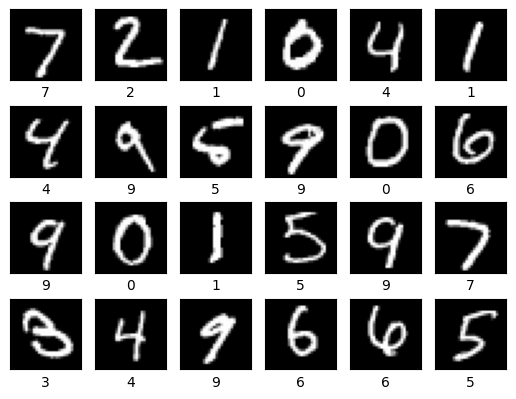

In [7]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(x[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [8]:
x.shape

(10000, 28, 28)

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [13]:
#распремляем тут
def flatten_images(images):
    return images.reshape((images.shape[0], -1))

x_flat = flatten_images(x)
x_flat.shape

(10000, 784)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_flat, y, test_size=0.2, random_state=7)

In [80]:
x_train.shape

(8000, 784)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [81]:
from sklearn.cluster import KMeans

k_means = KMeans(random_state=7, n_clusters=10)

k_means.fit(x_train, y_train)

KMeans(n_clusters=10, random_state=7)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [82]:
cluster_number = 2

labels = k_means.labels_

count_label_2 = np.count_nonzero(labels == cluster_number)
count_label_2

755

Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



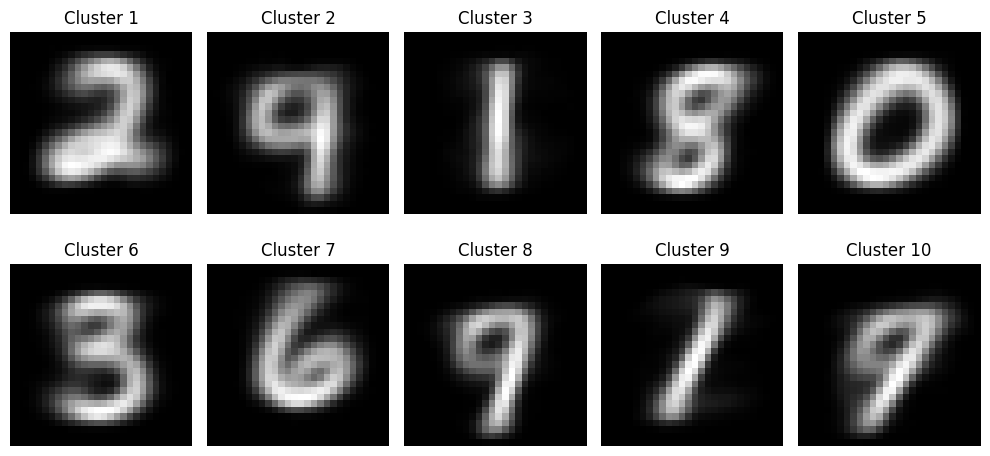

In [83]:
centroids = k_means.cluster_centers_

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i, centroid in enumerate(centroids):

    centroid_image = centroid.reshape(28, 28)

    axes[i].imshow(centroid_image, cmap='gray')
    axes[i].set_title(f'Cluster {i + 1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [84]:
labels_compare = pd.DataFrame({'kmean_label' : labels, 'correct_label' : y_train})
labels_compare.sample(5)

,kmean_label,correct_label
5576,0,2
5442,7,7
2010,0,2
5941,5,3
3390,6,6


In [85]:
taken_labels = labels_compare.groupby('kmean_label').agg(pd.Series.mode)
taken_labels

,correct_label
kmean_label,
0,2
1,4
2,1
3,8
4,0
5,3
6,6
7,7
8,1


In [99]:
correct_labels = []
for i in range(10):
  correct_labels.append(taken_labels.at[i, 'correct_label'])
correct_labels

[2, 4, 1, 8, 0, 3, 6, 7, 1, 7]

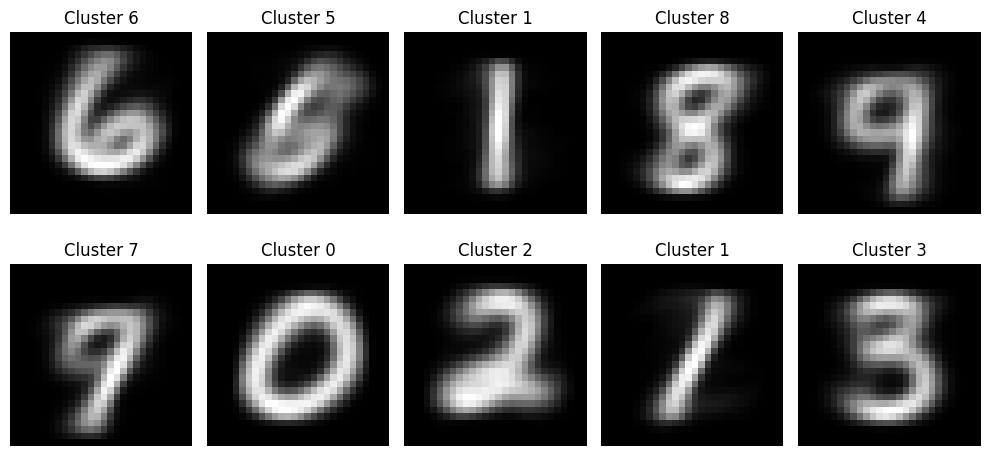

In [71]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i, centroid in enumerate(centroids):

    centroid_image = centroid.reshape(28, 28)

    axes[i].imshow(centroid_image, cmap='gray')
    axes[i].set_title(f"Cluster {correct_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

2, 4, 1, 8, 0, 3, 6, 7, 1, 7

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [87]:
from sklearn.metrics import accuracy_score

true_kmean_labels = [correct_labels[i] for i in labels]


accuracy_score(y_train, true_kmean_labels)

0.599875

При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [88]:
pred = k_means.predict(x_test)

In [89]:
true_correct_labels = [correct_labels[i] for i in pred]

accuracy_score(true_correct_labels, y_test)

0.5785

Постройте матрицу ошибок.

Text(95.72222222222221, 0.5, 'Actual')

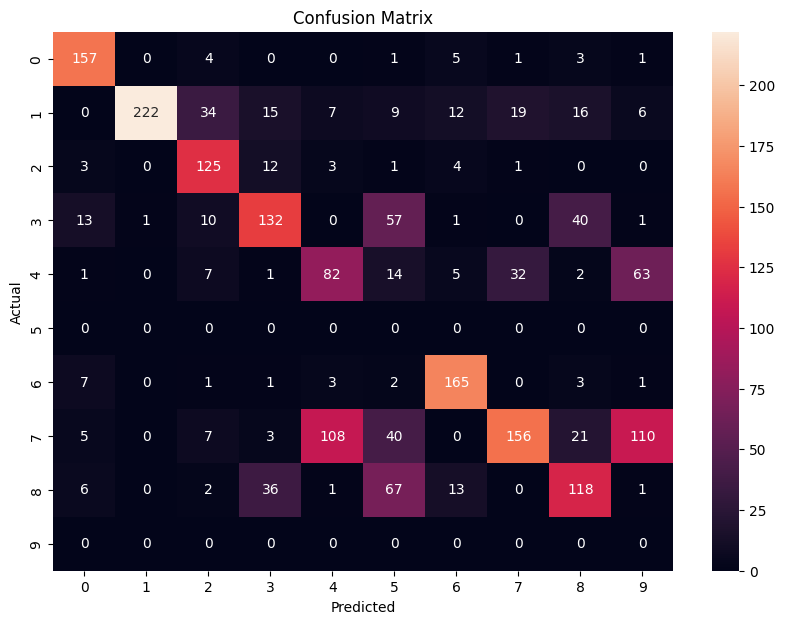

In [90]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(true_correct_labels, y_test)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [ ]:
# видимо 9 путала с 7

Преобразуйте тренировочный набор данных при помощи метода TSNE из библиотеки sklearn. Используйте параметры, указанные в вашем задании.

In [91]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=7)
train_tsne = tsne.fit_transform(x_train)

In [94]:
train_tsne.shape

(8000, 2)

In [103]:
k_means_tsne = KMeans(random_state=7, n_clusters=10)

k_means_tsne.fit(train_tsne)
labels_tsne = k_means_tsne.labels_

Дальше повторяем все также, как делали до этого

In [104]:
labels_compare_tsne = pd.DataFrame({'kmean_label' : labels_tsne, 'correct_label' : y_train})
labels_compare_tsne.sample(5)

,kmean_label,correct_label
5911,2,2
104,9,5
3105,4,6
3086,6,3
5103,2,1


In [105]:
taken_labels_tsne = labels_compare_tsne.groupby('kmean_label').agg(pd.Series.mode)
taken_labels_tsne

,correct_label
kmean_label,
0,0
1,7
2,2
3,4
4,6
5,9
6,3
7,1
8,8


In [106]:
correct_labels_tsne = []
for i in range(10):
  correct_labels_tsne.append(taken_labels_tsne.at[i, 'correct_label'])
correct_labels_tsne

[0, 7, 2, 4, 6, 9, 3, 1, 8, 5]

Вычислите точность модели на тренировчных данных.

In [107]:
true_kmean_labels_tsne = [correct_labels_tsne[i] for i in labels_tsne]

accuracy_score(y_train, true_kmean_labels_tsne)

0.82975

Проблема, однако, известна. t-SNE — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.

Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

In [108]:
# список для хранения сумм квадратов расстояний от каждой точки до центра ее кластера
wcss = []

for i in range(7, 17):
    kmeans = KMeans(random_state=7, n_clusters=i)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

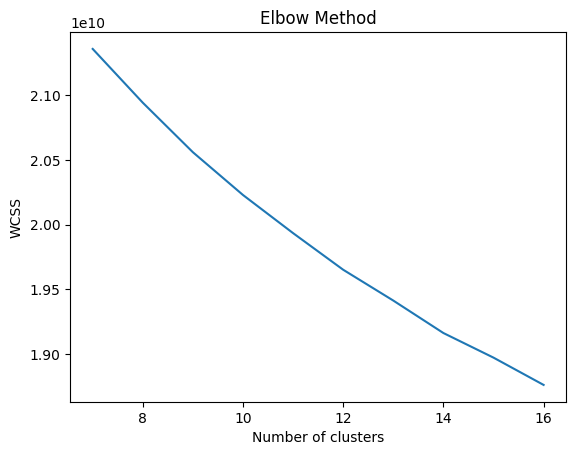

In [109]:
plt.plot(range(7, 17), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [ ]:
# < ENTER YOUR CODE HERE >

Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [ ]:
# < ENTER YOUR CODE HERE >